In [ ]:
# Predicting pregnancy related diabetes

## About Dataset

**Dataset from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict whether a patient has diabetes based on certain diagnostic measurements. All patients in the dataset are females at least 21 years old of Pima Indian heritage.**

*We can find several independent  variables (medical predictor variables) and the target dependent variable (Outcome).*

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [62]:
import warnings
# Suppress FutureWarning messages
warnings.simplefilter(action='ignore', category=FutureWarning)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

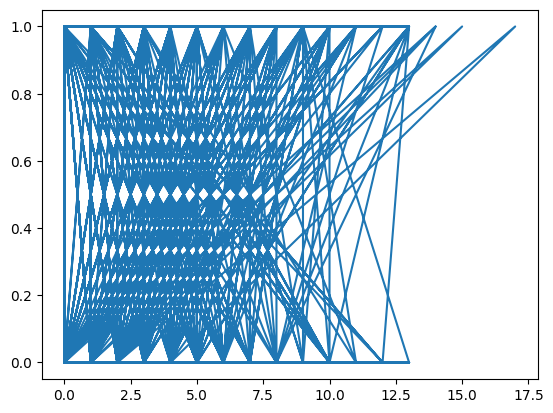

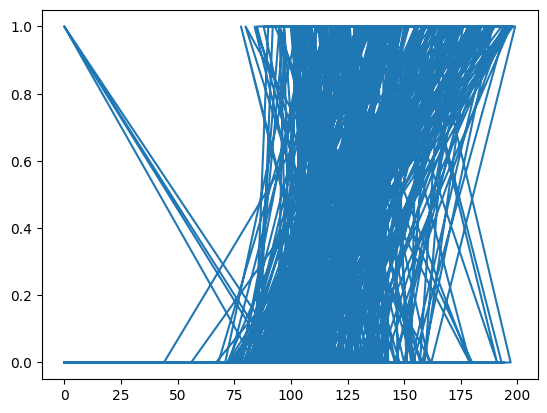

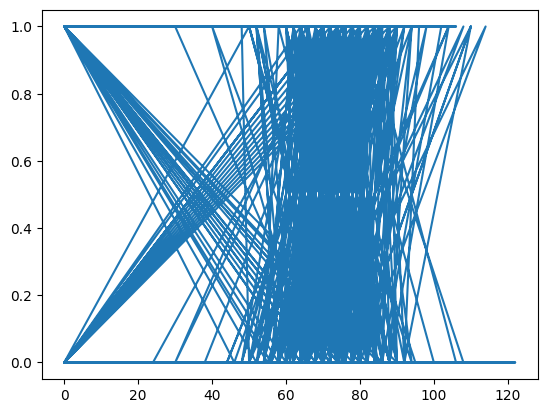

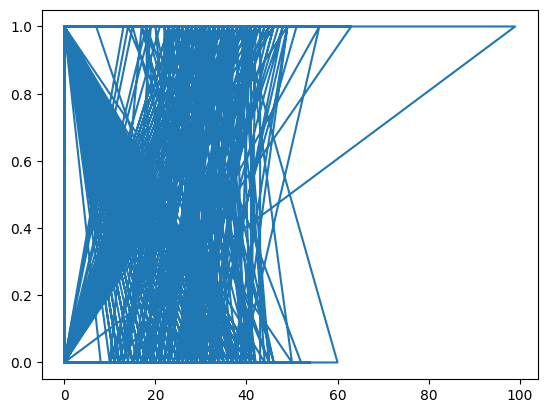

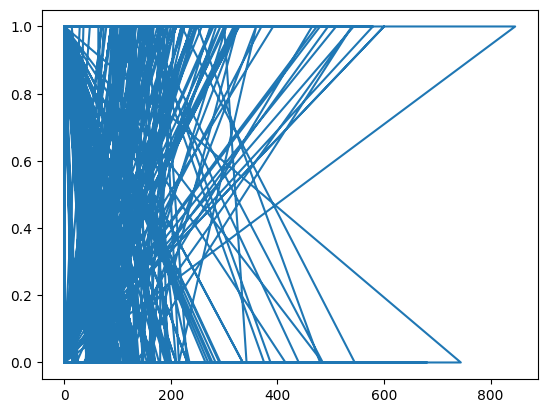

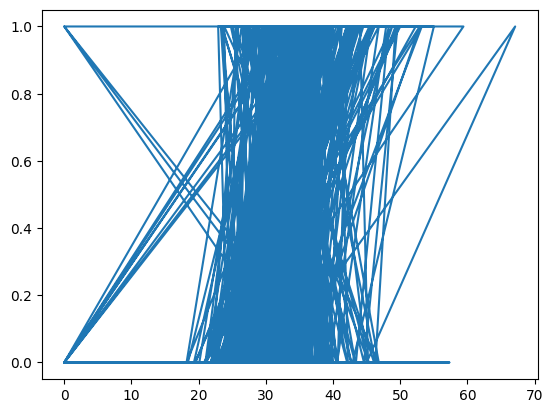

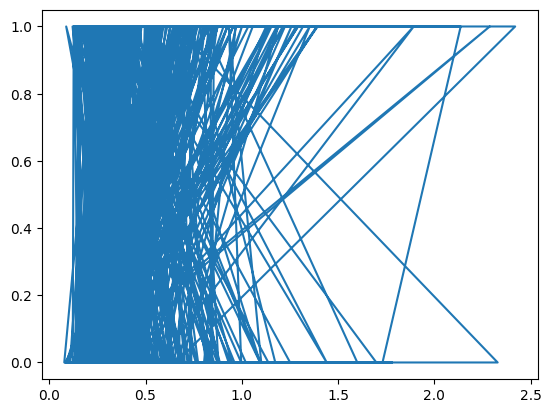

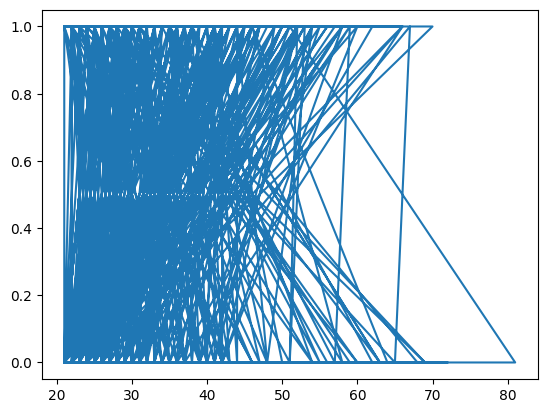

In [63]:
data = pd.read_csv('diabetesClean1.csv')
df1 = pd.DataFrame (data)
print (df1)
outcome = df1 ['Outcome']
df = df1.drop ( ['Outcome'], axis =1)
print ("--->", df.columns )
print (df)
for col in df.columns:
    plt.plot( df[col], outcome)
    plt.show()
    #print (df1[col])


## As seen before, no direct relation exists between the predictor and the outcome (diabetes in pregnancy) 

__Now, we will use Random Forest Models to predict the observed values, and SHAP to explain the variable contributions to the obtained models__

_We will only represent SHAPs of the models with higher accuracy compared with the previous one_



*************************************************************************
01 Attempt
*************************************************************************
Original Training set has X--> 691 samples.
Original Testing set has  --> 77 samples.
Secondary Training set has X--> 614 samples.
Secondary  Testing set has  --> 77 samples.

 Data prepared, let's go  to analyse... 
------------------------------------------


 The original train number are: 
 666    1
439    0
178    0
644    0
30     0
      ..
589    0
96     0
219    1
707    0
34     0
Name: Outcome, Length: 77, dtype: int64
 The Test-Predicted accuracy is:  0.14545245570755738


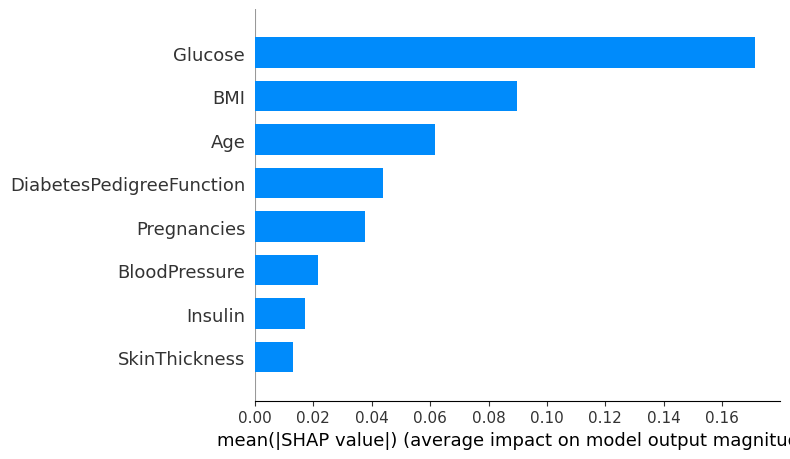

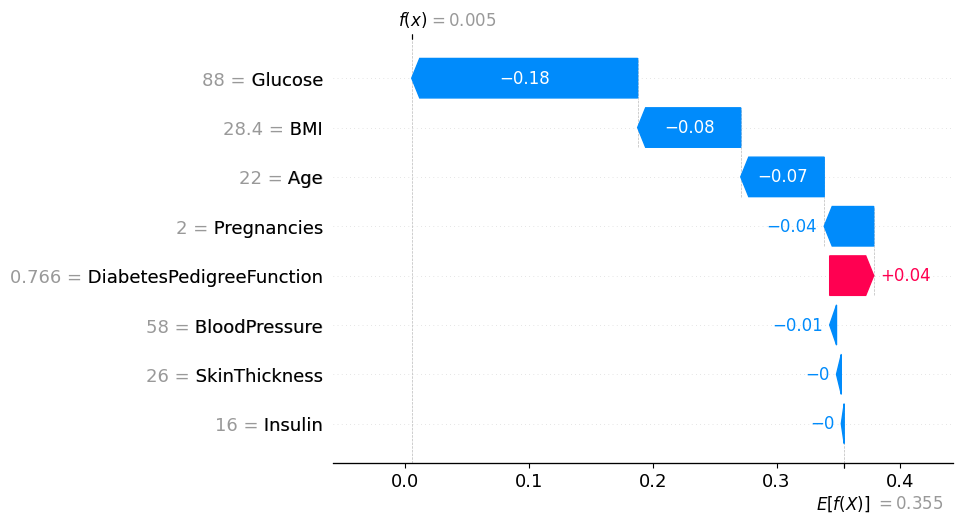



*************************************************************************
02 Attempt
*************************************************************************
Original Training set has X--> 691 samples.
Original Testing set has  --> 77 samples.
Secondary Training set has X--> 614 samples.
Secondary  Testing set has  --> 77 samples.

 Data prepared, let's go  to analyse... 
------------------------------------------


 The original train number are: 
 43     1
640    0
270    1
34     0
572    0
      ..
508    0
327    0
21     0
179    1
542    1
Name: Outcome, Length: 77, dtype: int64
 The Test-Predicted accuracy is:  0.16072056901578402


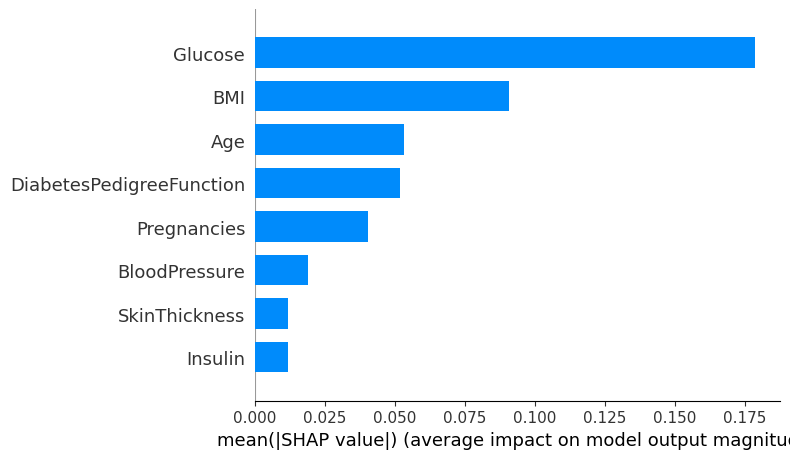

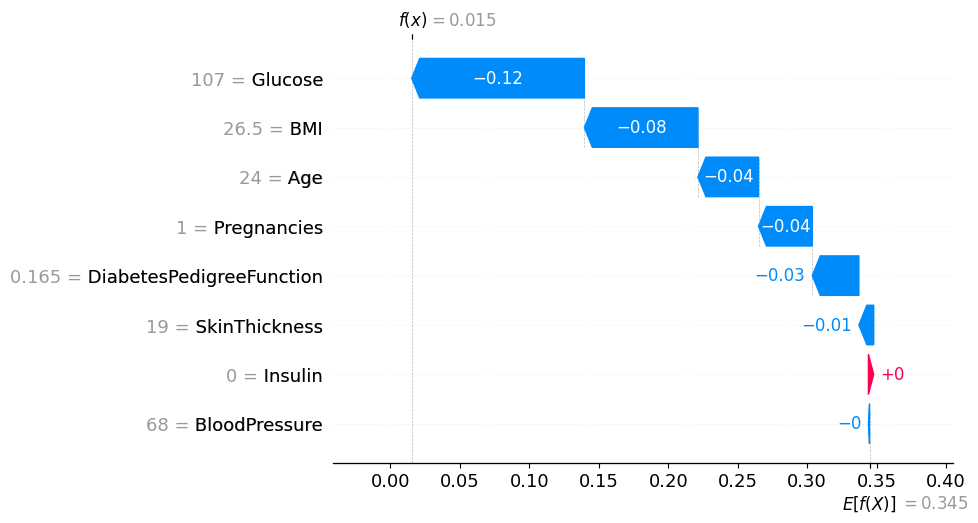



*************************************************************************
03 Attempt
*************************************************************************
Original Training set has X--> 691 samples.
Original Testing set has  --> 77 samples.
Secondary Training set has X--> 614 samples.
Secondary  Testing set has  --> 77 samples.

 Data prepared, let's go  to analyse... 
------------------------------------------


 The original train number are: 
 197    1
239    0
297    0
253    0
81     0
      ..
549    0
451    1
307    0
443    1
538    0
Name: Outcome, Length: 77, dtype: int64
 The Test-Predicted accuracy is:  0.28392472290640425


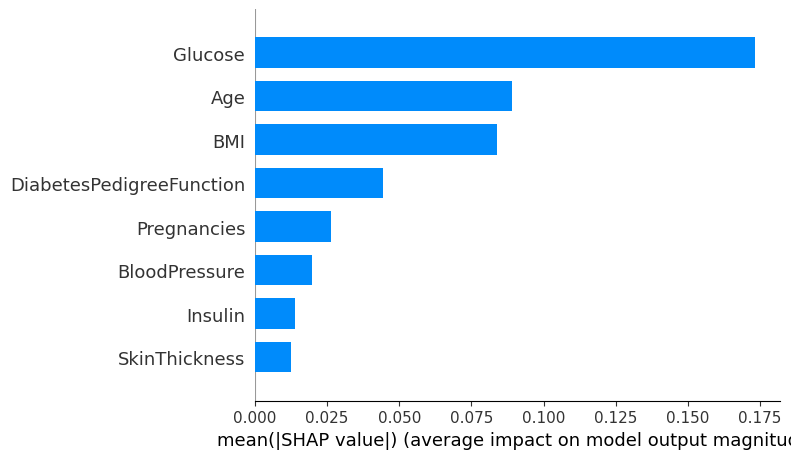

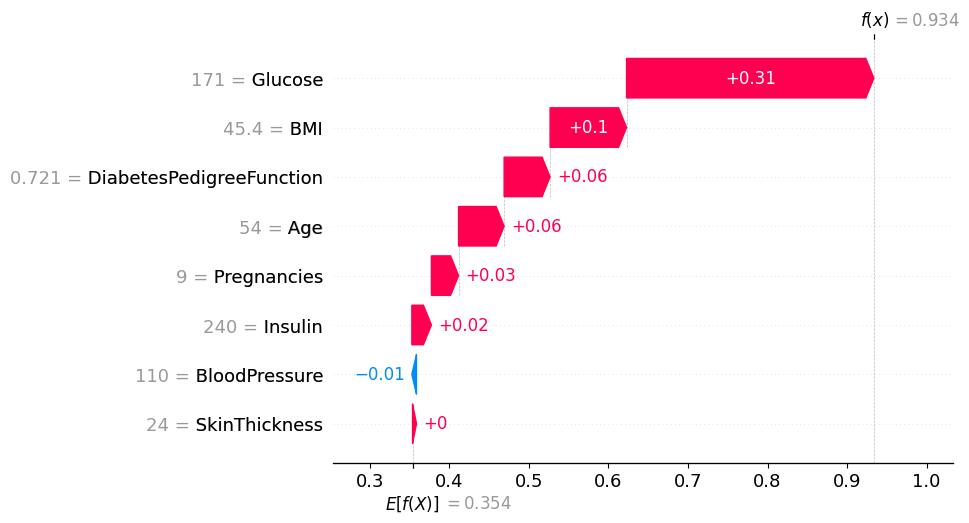



*************************************************************************
04 Attempt
*************************************************************************
Original Training set has X--> 691 samples.
Original Testing set has  --> 77 samples.
Secondary Training set has X--> 614 samples.
Secondary  Testing set has  --> 77 samples.

 Data prepared, let's go  to analyse... 
------------------------------------------


 The original train number are: 
 572    0
509    0
346    0
287    1
206    1
      ..
643    0
145    0
384    0
381    0
399    1
Name: Outcome, Length: 77, dtype: int64
 The Test-Predicted accuracy is:  0.41500463821892375


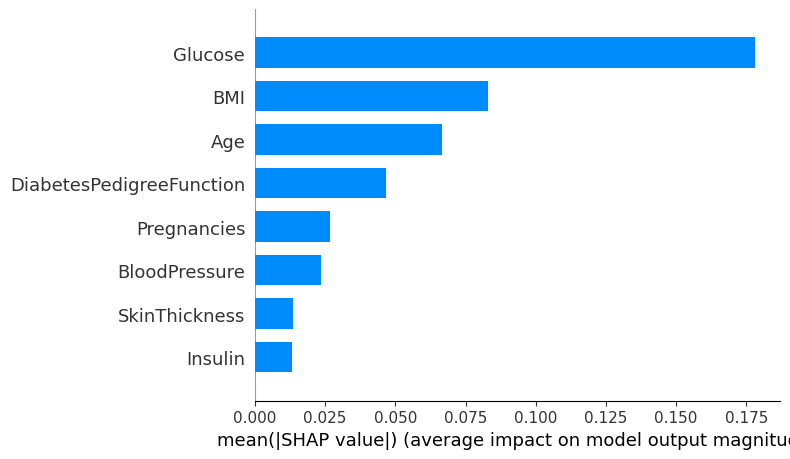

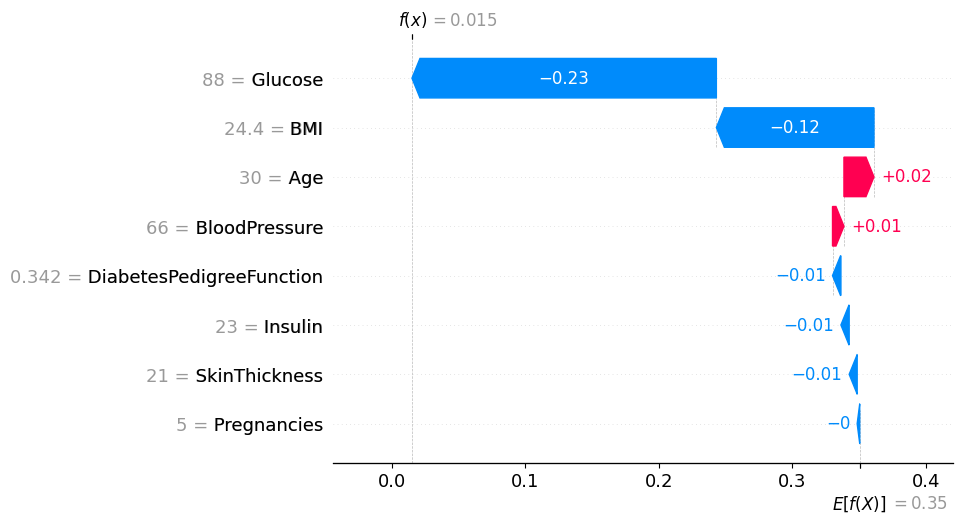



*************************************************************************
05 Attempt
*************************************************************************
Original Training set has X--> 691 samples.
Original Testing set has  --> 77 samples.
Secondary Training set has X--> 614 samples.
Secondary  Testing set has  --> 77 samples.

 Data prepared, let's go  to analyse... 
------------------------------------------


 The original train number are: 
 217    0
455    1
440    1
523    1
343    0
      ..
11     1
728    0
460    0
656    0
688    0
Name: Outcome, Length: 77, dtype: int64
 The Test-Predicted accuracy is:  0.18304082552676448


*************************************************************************
06 Attempt
*************************************************************************
Original Training set has X--> 691 samples.
Original Testing set has  --> 77 samples.
Secondary Training set has X--> 614 samples.
Secondary  Testing set has  --> 77 samples.

 Data prepare

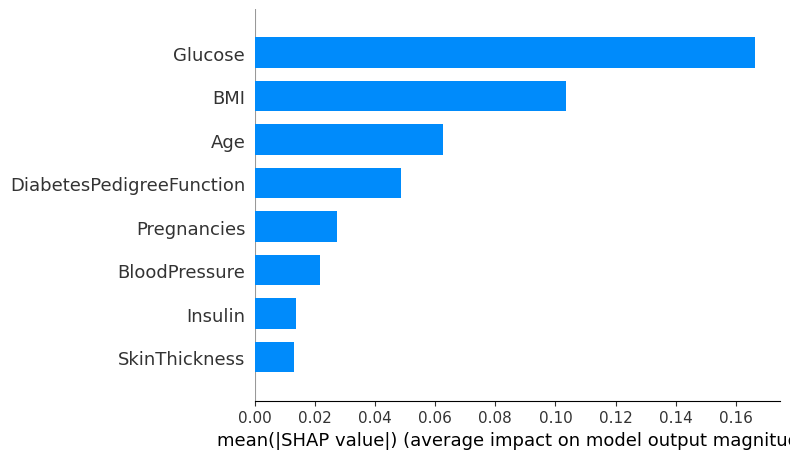

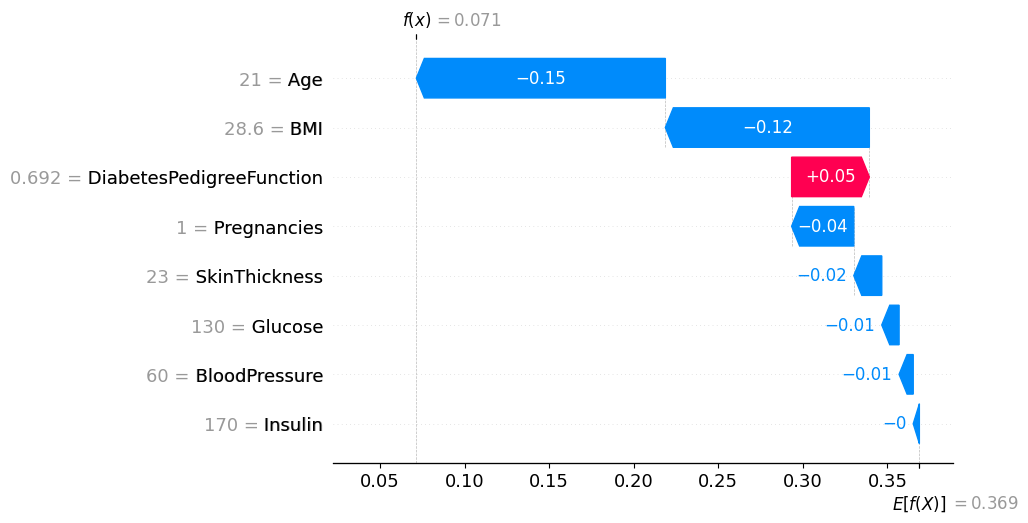



*************************************************************************
20 Attempt
*************************************************************************
Original Training set has X--> 691 samples.
Original Testing set has  --> 77 samples.
Secondary Training set has X--> 614 samples.
Secondary  Testing set has  --> 77 samples.

 Data prepared, let's go  to analyse... 
------------------------------------------


 The original train number are: 
 446    0
575    0
229    0
97     0
522    0
      ..
457    0
16     1
302    0
78     1
147    0
Name: Outcome, Length: 77, dtype: int64
 The Test-Predicted accuracy is:  0.36022693851976884


*************************************************************************
21 Attempt
*************************************************************************
Original Training set has X--> 691 samples.
Original Testing set has  --> 77 samples.
Secondary Training set has X--> 614 samples.
Secondary  Testing set has  --> 77 samples.

 Data prepare

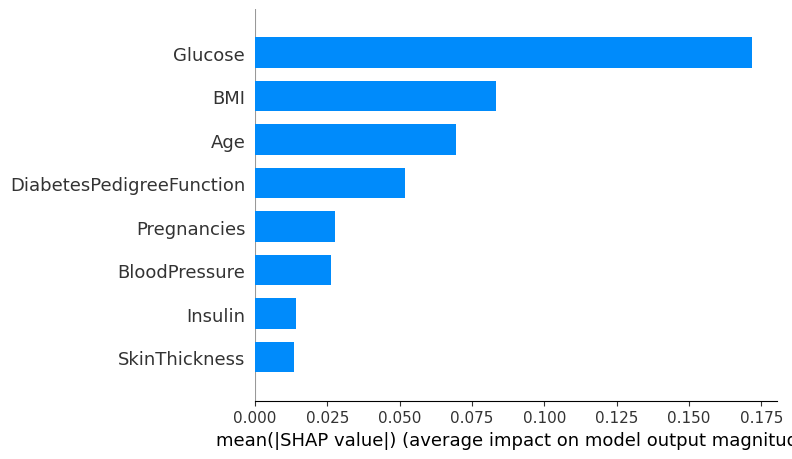

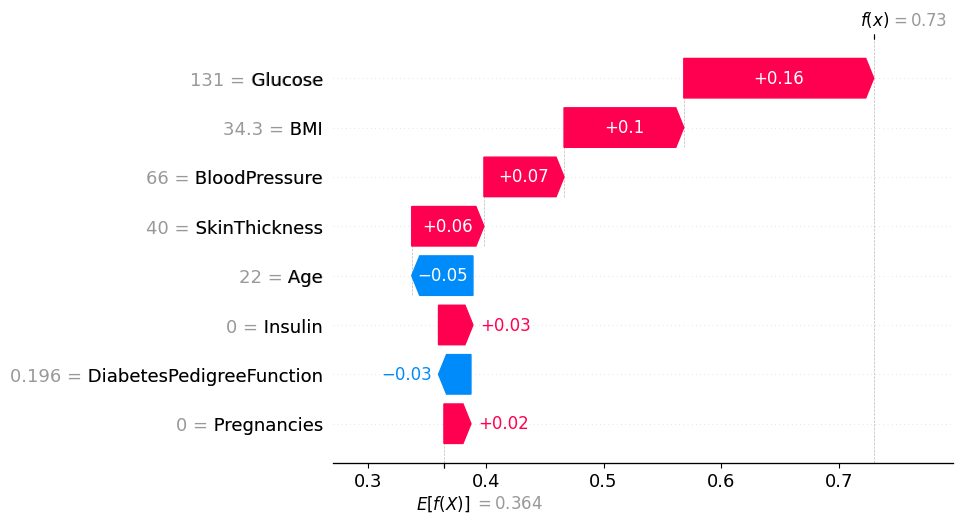



*************************************************************************
24 Attempt
*************************************************************************
Original Training set has X--> 691 samples.
Original Testing set has  --> 77 samples.
Secondary Training set has X--> 614 samples.
Secondary  Testing set has  --> 77 samples.

 Data prepared, let's go  to analyse... 
------------------------------------------


 The original train number are: 
 84     1
72     1
20     0
179    1
343    0
      ..
307    0
29     0
756    0
78     1
659    1
Name: Outcome, Length: 77, dtype: int64
 The Test-Predicted accuracy is:  0.10731175050882891


*************************************************************************
25 Attempt
*************************************************************************
Original Training set has X--> 691 samples.
Original Testing set has  --> 77 samples.
Secondary Training set has X--> 614 samples.
Secondary  Testing set has  --> 77 samples.

 Data prepare

In [71]:
from sklearn.ensemble import RandomForestRegressor
import shap

N=df.shape[0]
n_results = 7
i = 0
model = RandomForestRegressor(n_estimators=196, random_state=None) # 1000, None
rfsc =0
while i < 50:
    print("\n\n*************************************************************************")
    print (str(f"{i+1:02d}") + " Attempt\n*************************************************************************")
    X_traint, X_testt, y_traint, y_testt = train_test_split(df, outcome, test_size = 0.1, random_state = None)
    print("Original Training set has X--> {} samples.".format(X_traint.shape[0]))
    #print (X_train)
    print("Original Testing set has  --> {} samples.".format(X_testt.shape[0]))

    X_train, X_test, y_train, y_test = train_test_split(X_traint, y_traint, test_size = 0.11, random_state = None)
    print("Secondary Training set has X--> {} samples.".format(X_train.shape[0]))
    #print (X_train)
    print("Secondary  Testing set has  --> {} samples.".format(X_test.shape[0]))
    
    print ("\n Data prepared, let's go  to analyse... " )
    print ("------------------------------------------\n\n")

    y_test.columns =['Outcome']
    model.fit(X_train,y_train)
    
    # Use the trained model to predict the next 6 numbers for each set of features
    # Print the most likely set of numbers
   
    #print (" The original train number are: \n", y_test1)

    predictions = model.predict(X_test)
    # Get the most likely set of numbers based on the predictions
    #print (predictions)
    #rfScore = model.score(X_test, y_test)
    #print( " The Test-Predicted accuracy is: ", rfScore)
        
    print (" The original train number are: \n", y_testt)

    predictionst = model.predict(X_testt)
    # Get the most likely set of numbers based on the predictions
    #print (predictionst)

    
    rfScore = model.score(X_testt, y_testt)
    print( " The Test-Predicted accuracy is: ", rfScore)
    if rfScore >= rfsc :
    # Calculate Shap values
        explainer = shap.Explainer(model)
        shap_values = explainer(X_train)

        shap.summary_plot(shap_values, X_train, plot_type="bar")
        shap.plots.waterfall(shap_values[0])
        rfsc = rfScore
   
    i += 1



*************************************************************************
01 Attempt
*************************************************************************
Original Training set has X--> 691 samples.
Original Testing set has  --> 77 samples.
Secondary Training set has X--> 614 samples.
Secondary  Testing set has  --> 77 samples.

 Data prepared, let's go  to analyse... 
------------------------------------------


 The original train number are: 
 289    0
483    0
361    0
260    0
143    1
      ..
368    0
685    0
492    0
1      0
3      0
Name: Outcome, Length: 77, dtype: int64
 The Test-Predicted accuracy is:  0.18334832544105828


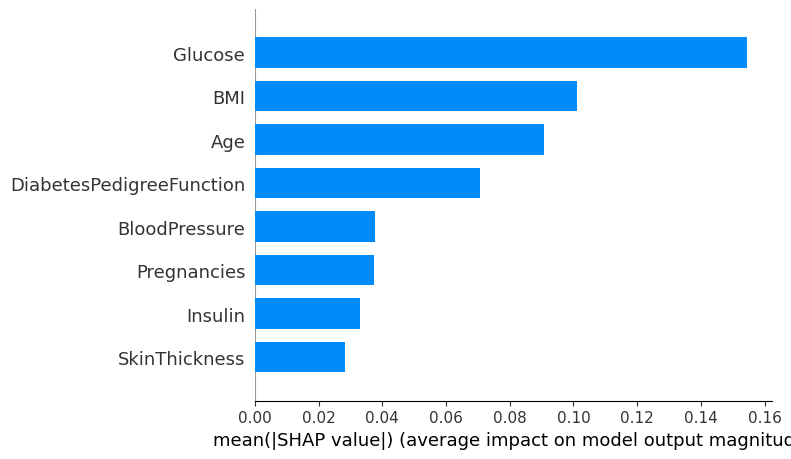

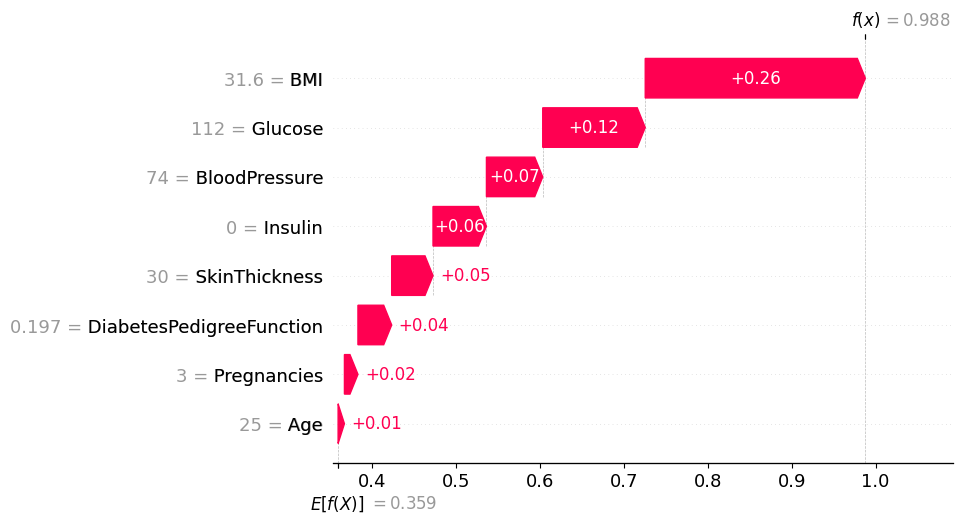



*************************************************************************
02 Attempt
*************************************************************************
Original Training set has X--> 691 samples.
Original Testing set has  --> 77 samples.
Secondary Training set has X--> 614 samples.
Secondary  Testing set has  --> 77 samples.

 Data prepared, let's go  to analyse... 
------------------------------------------


 The original train number are: 
 214    1
107    0
375    1
733    0
446    0
      ..
121    0
297    0
397    1
471    0
529    0
Name: Outcome, Length: 77, dtype: int64
 The Test-Predicted accuracy is:  0.23555781757712102


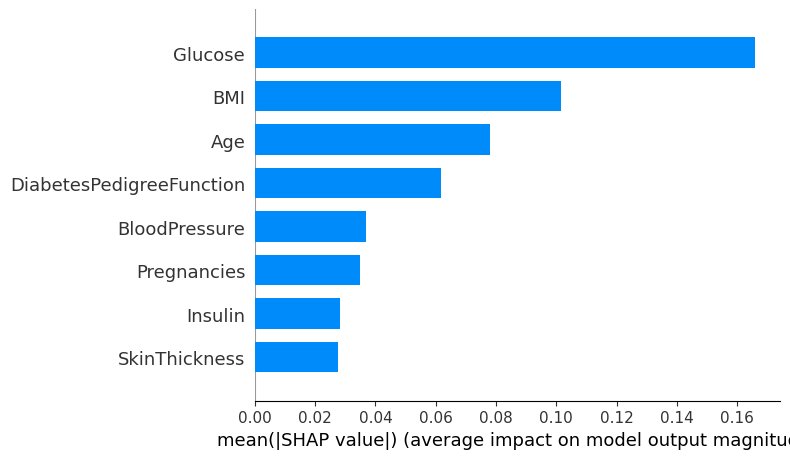

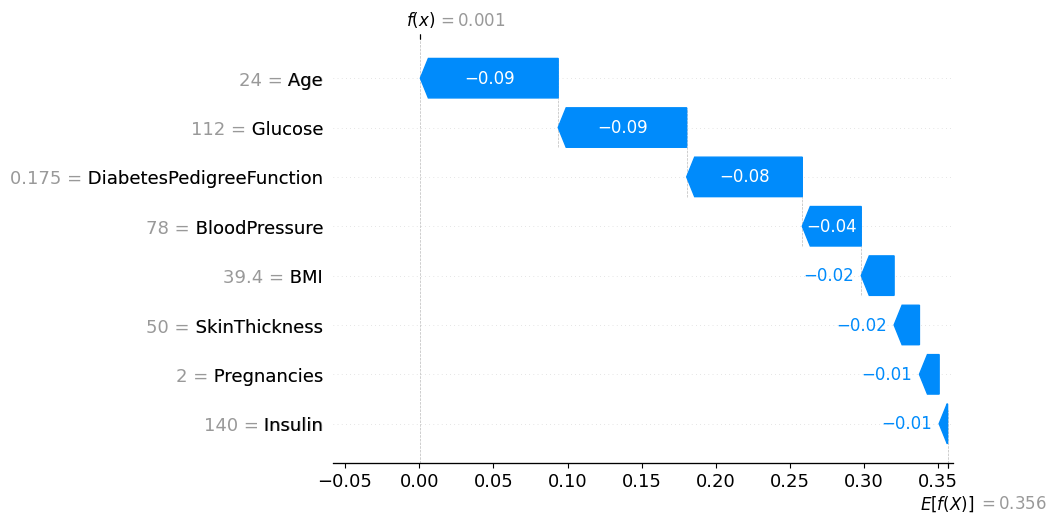



*************************************************************************
03 Attempt
*************************************************************************
Original Training set has X--> 691 samples.
Original Testing set has  --> 77 samples.
Secondary Training set has X--> 614 samples.
Secondary  Testing set has  --> 77 samples.

 Data prepared, let's go  to analyse... 
------------------------------------------


 The original train number are: 
 526    0
235    1
310    0
144    0
566    0
      ..
378    1
110    1
323    1
718    0
151    0
Name: Outcome, Length: 77, dtype: int64
 The Test-Predicted accuracy is:  0.1189217531409853


*************************************************************************
04 Attempt
*************************************************************************
Original Training set has X--> 691 samples.
Original Testing set has  --> 77 samples.
Secondary Training set has X--> 614 samples.
Secondary  Testing set has  --> 77 samples.

 Data prepared

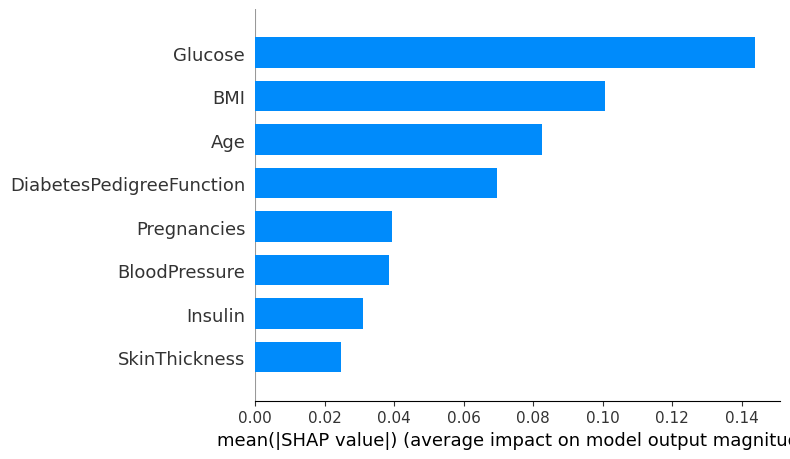

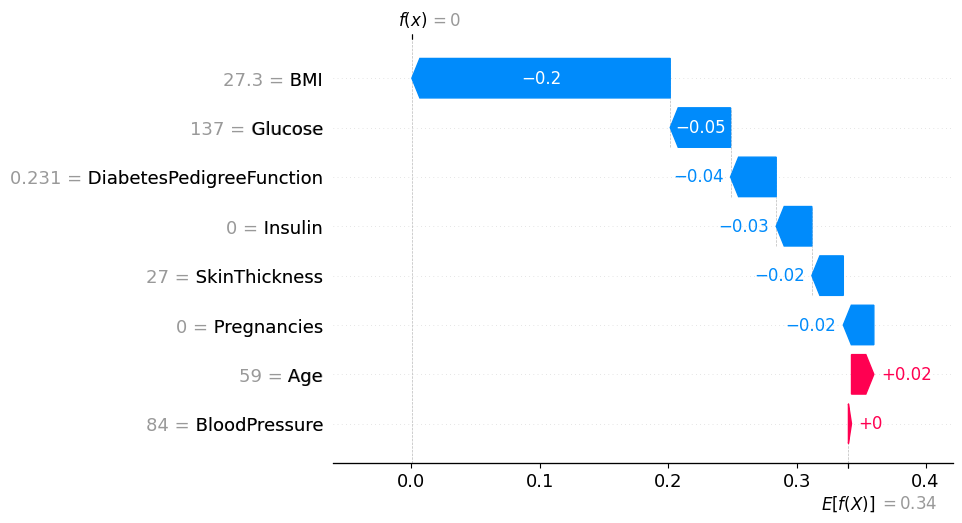



*************************************************************************
05 Attempt
*************************************************************************
Original Training set has X--> 691 samples.
Original Testing set has  --> 77 samples.
Secondary Training set has X--> 614 samples.
Secondary  Testing set has  --> 77 samples.

 Data prepared, let's go  to analyse... 
------------------------------------------


 The original train number are: 
 40     0
127    0
632    0
347    0
362    0
      ..
767    0
517    0
95     0
416    0
280    1
Name: Outcome, Length: 77, dtype: int64
 The Test-Predicted accuracy is:  0.007800703592150127


*************************************************************************
06 Attempt
*************************************************************************
Original Training set has X--> 691 samples.
Original Testing set has  --> 77 samples.
Secondary Training set has X--> 614 samples.
Secondary  Testing set has  --> 77 samples.

 Data prepar

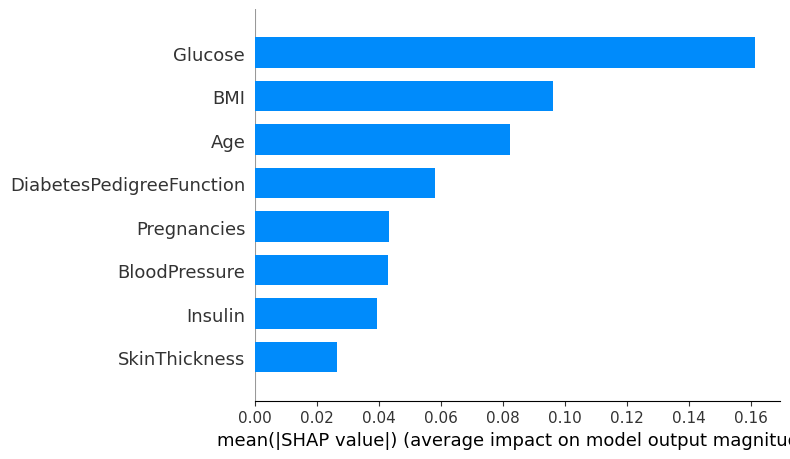

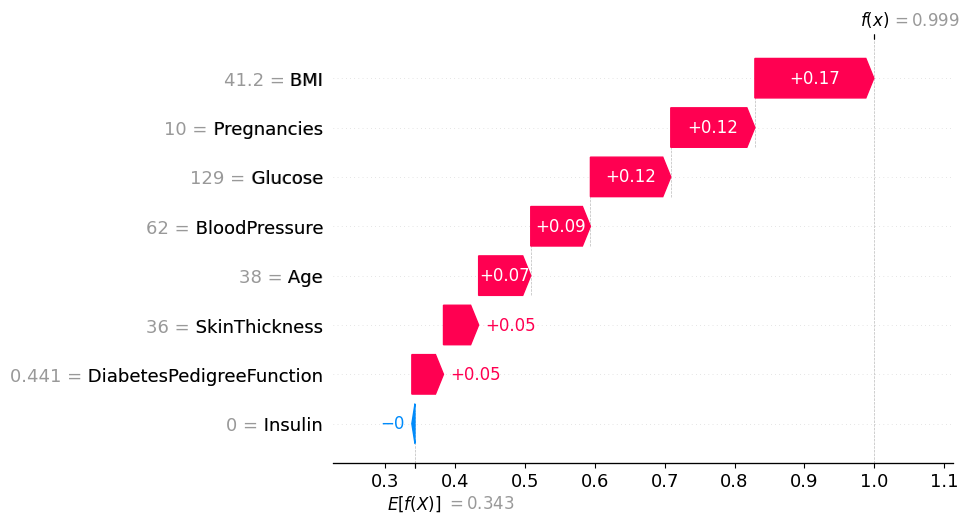



*************************************************************************
07 Attempt
*************************************************************************
Original Training set has X--> 691 samples.
Original Testing set has  --> 77 samples.
Secondary Training set has X--> 614 samples.
Secondary  Testing set has  --> 77 samples.

 Data prepared, let's go  to analyse... 
------------------------------------------


 The original train number are: 
 185    1
598    1
657    0
409    1
175    1
      ..
73     0
481    0
730    1
297    0
717    0
Name: Outcome, Length: 77, dtype: int64
 The Test-Predicted accuracy is:  0.357628941029861


*************************************************************************
08 Attempt
*************************************************************************
Original Training set has X--> 691 samples.
Original Testing set has  --> 77 samples.
Secondary Training set has X--> 614 samples.
Secondary  Testing set has  --> 77 samples.

 Data prepared,

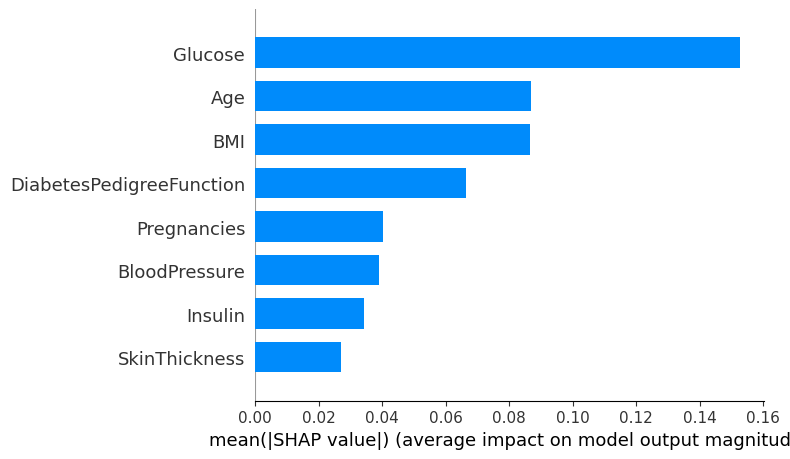

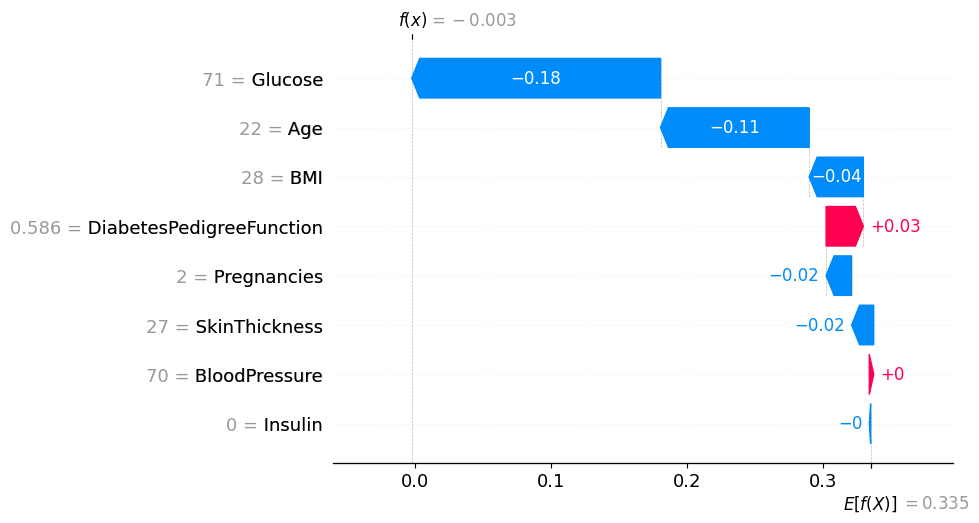



*************************************************************************
14 Attempt
*************************************************************************
Original Training set has X--> 691 samples.
Original Testing set has  --> 77 samples.
Secondary Training set has X--> 614 samples.
Secondary  Testing set has  --> 77 samples.

 Data prepared, let's go  to analyse... 
------------------------------------------


 The original train number are: 
 696    1
514    0
396    0
389    0
584    1
      ..
428    0
635    1
343    0
436    0
12     0
Name: Outcome, Length: 77, dtype: int64
 The Test-Predicted accuracy is:  0.05964745796322812


*************************************************************************
15 Attempt
*************************************************************************
Original Training set has X--> 691 samples.
Original Testing set has  --> 77 samples.
Secondary Training set has X--> 614 samples.
Secondary  Testing set has  --> 77 samples.

 Data prepare

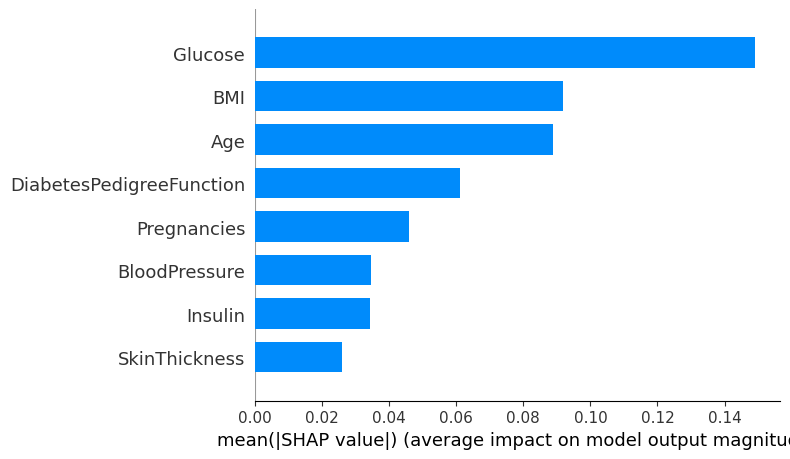

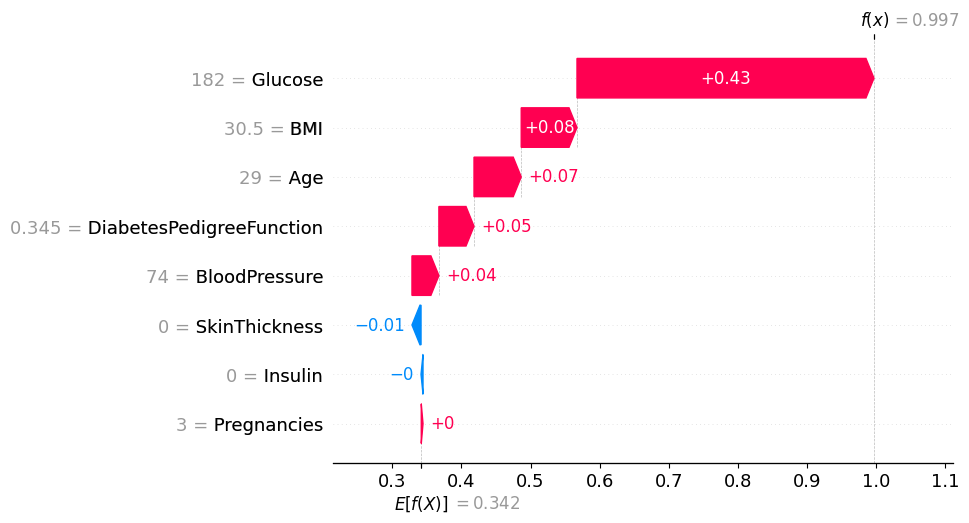



*************************************************************************
21 Attempt
*************************************************************************
Original Training set has X--> 691 samples.
Original Testing set has  --> 77 samples.
Secondary Training set has X--> 614 samples.
Secondary  Testing set has  --> 77 samples.

 Data prepared, let's go  to analyse... 
------------------------------------------


 The original train number are: 
 623    0
719    1
334    0
697    0
512    0
      ..
209    1
399    1
100    1
162    0
56     1
Name: Outcome, Length: 77, dtype: int64
 The Test-Predicted accuracy is:  0.19805241551962804


*************************************************************************
22 Attempt
*************************************************************************
Original Training set has X--> 691 samples.
Original Testing set has  --> 77 samples.
Secondary Training set has X--> 614 samples.
Secondary  Testing set has  --> 77 samples.

 Data prepare

In [72]:
#from xgboost import XGBClassifier
from xgboost import XGBRegressor
import shap

N=df.shape[0]
n_results = 7
i = 0
# create model instance
#bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')

# Define and train the model
model = XGBRegressor(n_estimators=196, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8, tree_method='hist')



rfsc =0
while i < 50:
    print("\n\n*************************************************************************")
    print (str(f"{i+1:02d}") + " Attempt\n*************************************************************************")
    X_traint, X_testt, y_traint, y_testt = train_test_split(df, outcome, test_size = 0.1, random_state = None)
    print("Original Training set has X--> {} samples.".format(X_traint.shape[0]))
    #print (X_train)
    print("Original Testing set has  --> {} samples.".format(X_testt.shape[0]))

    X_train, X_test, y_train, y_test = train_test_split(X_traint, y_traint, test_size = 0.11, random_state = None)
    print("Secondary Training set has X--> {} samples.".format(X_train.shape[0]))
    #print (X_train)
    print("Secondary  Testing set has  --> {} samples.".format(X_test.shape[0]))
    
    print ("\n Data prepared, let's go  to analyse... " )
    print ("------------------------------------------\n\n")

    y_test.columns =['Outcome']
    model.fit(X_train,y_train)
    
    # Use the trained model to predict the next 6 numbers for each set of features
    # Print the most likely set of numbers
   
    #print (" The original train number are: \n", y_test1)

    predictions = model.predict(X_test)
    # Get the most likely set of numbers based on the predictions
    #print (predictions)
    #rfScore = model.score(X_test, y_test)
    #print( " The Test-Predicted accuracy is: ", rfScore)
        
    print (" The original train number are: \n", y_testt)

    predictionst = model.predict(X_testt)
    # Get the most likely set of numbers based on the predictions
    #print (predictionst)

    
    rfScore = model.score(X_testt, y_testt)
    print( " The Test-Predicted accuracy is: ", rfScore)
    if rfScore >= rfsc :
    # Calculate Shap values
        explainer = shap.Explainer(model)
        shap_values = explainer(X_train)

        shap.summary_plot(shap_values, X_train, plot_type="bar")
        shap.plots.waterfall(shap_values[0])
        rfsc = rfScore
   
    i += 1
